# Confidence Interval + Margin of Error for Means:
- When Sigma is Kown
- When Sigma is NOT known

## Sampling Distribution:
- pop.mean = u
- pop.sd = sigma
- sample.size = n
- sample.mean = u
- sample.sd = sigma/sqrt(n)

### Example 1: Student IQ Test when Sigma is known:
- Normally Distributed
- Population Mean = 100
- Population SD = 15
- Sample Size = 9
- Sample Mean = 100 (xbar, Sample Mean of Sampling Distribution, will be close to 100)
- Sample SD = 15/sqrt(9)
- As Sample Count increases, Distribution of Mean of Means (xbar) will approach Normal Distribution

|         | Population |  n = 9  | n = 16  |  n = 25 | n = 100 |
|:--------|:-----------|:--------|:--------|:--------|:--------|
| Mean    |100         | 100     | 100     | 100     | 100     |
| SD      |15          | 5       | 3.75    | 3       | 1.5     |

## Confidence Interval:
- Standard Error, SE = pop.sd/sqrt(sample.size) = sigma/sqrt(n)
- Margin of Error = z * SE = z * (sigma/sqrt(n))
- Confidence Interval = Sample Mean +/- Margin of Error = u +/- z * (sigma/sqrt(n))

### % Confidence:
- Area between left and right z scores
- As %Confidence increases, Confidence Interval also increases

#### Find z-score for % confidence:
- 90% confidence: z = qnorm( (1-0.9)/2 )  = -1.645
    - Area in each Tail: (1-0.9)/2 = 0.05
- 95% confidence: z = qnorm( (1-0.95)/2 )  = -1.96
    - Area in each Tail: (1-0.95)/2 = 0.025
- 99% confidence: z = qnorm( ((1-0.99)/2 ) = -2.575
    - Area in each Tail: (1-0.99)/2 = 0.005

### Example 1: When sigma is known

In [1]:
interval_confidence <- function(pop.mean=100, pop.sd=15, sample.size=9, sample.count=20, confidence=0.95){
  
  # Initialize variables:
  pop.mean <- pop.mean
  sigma <- pop.sd
  n <- sample.size
  sample.count <- sample.count
  
  #Compute z-score, SE, and ME based on % confidence
  confidence <- confidence
  z <- abs(qnorm((1-confidence)/2))   
  std_error <- sigma/sqrt(n)    
  margin_error <- z * std_error 
  
  # Create a Data Frame
  xbar <- data.frame(mean=1:sample.count)
  
  for (i in 1:sample.count){
    #Generate Sampling Distributions based on Population Mean and SD
    xbar$mean[i] <- mean(rnorm(n, mean=pop.mean, sd=sigma))
    #Create a column "margin" for Margin of Error
    xbar$margin[i] <- margin_error
    #Create a column "lower.interval" for Lower Bound Confidence Interval
    xbar$lower.interval[i] <- xbar$mean[i] - xbar$margin[i]
    #Create a column "upper.interval" for Upper Bound Confidence Interval
    xbar$upper.interval[i] <- xbar$mean[i] + xbar$margin[i]
    #Create a column "contains.mean" to check if Interval contains the Mean
    xbar$contains.mean[i] <- xbar$lower.interval[i] <= pop.mean &  xbar$upper.interval[i] >= pop.mean
  }
  xbar
}

#### 90% Confidence with Population Mean = 100, SD = 15, Sample Size = 9, Sample Count at 20

In [2]:
u <- 100
sigma <- 15
n <- 9
count <- 20

interval_confidence(pop.mean=u, pop.sd=sigma, sample.size=n, sample.count=count, confidence=0.90)
# Can execute function without parameters if values are equal to default values: interval_confidence()

mean,margin,lower.interval,upper.interval,contains.mean
95.61672,8.224268,87.39245,103.84098,TRUE
91.68013,8.224268,83.45586,99.90439,FALSE
96.73805,8.224268,88.51378,104.96232,TRUE
107.44764,8.224268,99.22337,115.67190,TRUE
89.22968,8.224268,81.00541,97.45395,FALSE
91.35777,8.224268,83.13351,99.58204,FALSE
105.80077,8.224268,97.57650,114.02504,TRUE
112.24497,8.224268,104.02070,120.46924,FALSE
102.14757,8.224268,93.92330,110.37183,TRUE
96.57057,8.224268,88.34630,104.79483,TRUE


### Interpretation of Confidence Interval:
- If number of samples are increased, proportion of samples that capture the population mean will approach %Confidence


### Example 2: Compute the Confidence Interval of the Average Speed of Cars on Highway (when Sigma is known):
- Sample Data of Speed of cars: 57.4, 44.2, 62.2, 56.1, 68.6, 60.4, 70.3, 66.1, 64.5, 65.6, 57.3, 52.7
- Sample Mean = 59.62
- Population SD = sigma = 8
- Sample Size = n = 12
- Confidence Interval = 90%

#### Solution:
- Significance = (1-0.9)/2 = 0.05
- z(of 0.05) = 1.645
- Margin of Error = ME = z*(sigma/sqrt(n)) = 1.645 * (8/sqrt(12)) = 3.80
- 90% Confidence Interval = Mean +/- ME = 59.62 +/- 3.80
- 90% Confidence Interval = 55.82 – 63.42

In [3]:
data <- c(57.4, 44.2, 62.2, 56.1, 68.6, 60.4, 70.3, 66.1, 64.5, 65.6, 57.3, 52.7)
sample.mean <- mean(data)
sigma <- 8
n <- 12

#90% Confidence:
confidence <- 0.9
z <- abs(qnorm((1-confidence)/2))  
std.error <- sigma/sqrt(n)    
margin.error <- z * std.error

lower.interval <- sample.mean - margin.error
upper.interval <- sample.mean + margin.error
paste(lower.interval, " to ", upper.interval)

[1] "56.6513732628081  to  64.2486267371919"

<hr>

# Confidence Interval Estimation when Sigma is NOT Known
How to predict the value of Population Mean when sigma is NOT given

### Use Sample SD instead of Population SD, using t-statistics instead of z-statistics
- Standard Error, SE = sample.sd/sqrt(sample.size) = s/sqrt(n)
- Margin of Error = t * SE = t * (s/sqrt(n))
- Confidence Interval = Sample Mean +/- Margin of Error = u +/- t * (s/sqrt(n))

## t-distribution:
- Depended on degree of freedom
- As degree of freedom increase, t-statistics become closer to z-statistics

#### dt() family of functions work similar to pnrom() family of functions

In [4]:
#?dt

#### Generate vector of sequence drom -4 to +4 and Plot as a normal distribution curve:
- dnorm generates density for distribution
- Plot t-distribution curves with increasing degree of freedom
- As degree of freedom increaes, the t-distibution approaches normal distribution
- Use lines() to plot on the same graph: same as plot() with type='l' argument

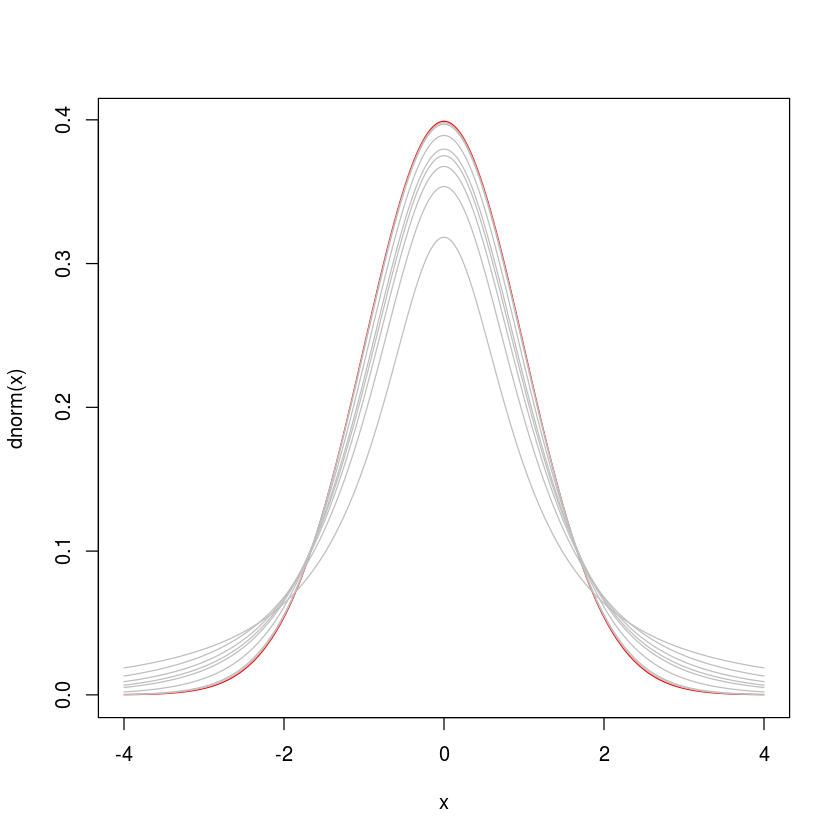

In [5]:
x <- seq(-4,4,0.01)
plot(x,dnorm(x),type='l', col='red')
lines(x,dt(x,df=1),col='grey')
lines(x,dt(x,df=2),col='grey')
lines(x,dt(x,df=3),col='grey')
lines(x,dt(x,df=4),col='grey')
lines(x,dt(x,df=5),col='grey')
lines(x,dt(x,df=10),col='grey')
lines(x,dt(x,df=50),col='grey')
lines(x,dt(x,df=100),col='grey')

### Comparing t-distribution with degree of freedom=100 to Normal Distribution

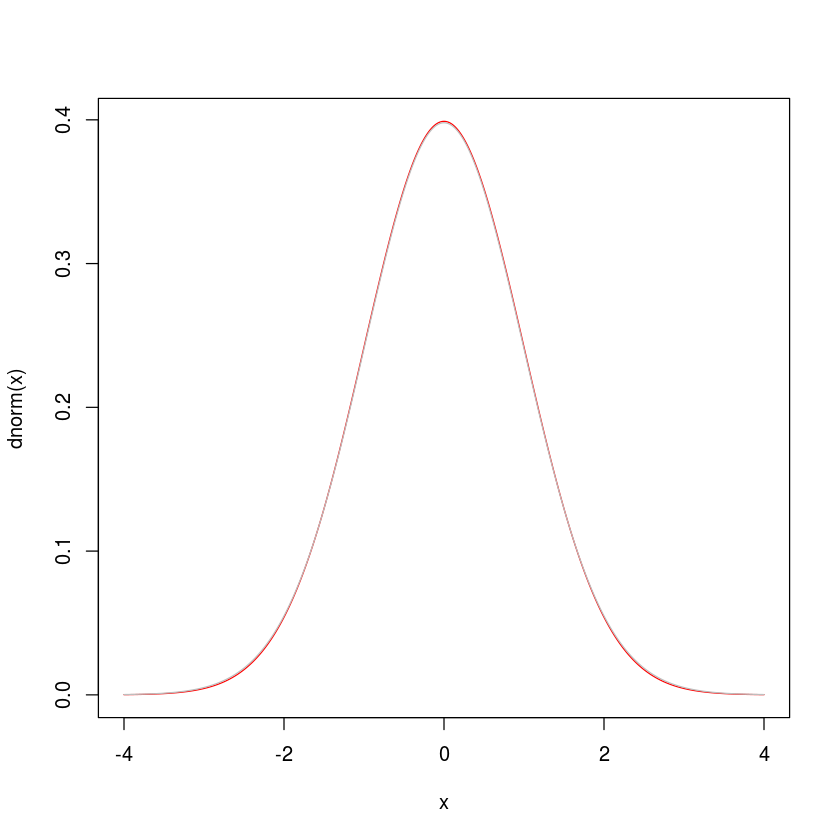

In [6]:
plot(x,dnorm(x),type='l', col='red')
lines(x,dt(x,df=100),col='grey')

### Example 3: Compute the Confidence Interval of the Diameter of White Oak Tree when Sigma is NOT known
- Sample Data of Diameter size: 64.0, 33.4, 45.8, 56.0, 51.5, 29.2, 63.7

#### Solution:
- Sample Mean = 49.09
- Sample Sd = s = 13.90
- Sample Size = 7
- Degree of Freedom = 6
- Confidence= 95%
- Significance = (1-0.95) / 2 = 0.025
- t(of 0.025 and df of 6) = 2.447
- ME = 2.447 * (13.80/sqrt(7)) = 12.76
- 95% Confidence Interval = 49.09 +/- 12.76 = 36.33 – 61.85

In [7]:
data <- c(64.0, 33.4, 45.8, 56.0, 51.5, 29.2, 63.7)
sample.mean <- mean(data)
sample.sd <- sd(data)
n <- 7

confidence <- 0.95
degree.freedom <- n -1
t <- abs(qt((1-confidence)/2, degree.freedom)) #2.14

std.error <- sample.sd/sqrt(n) #0.366
margin.error <- t*(std.error) #0.778

lower.interval <- sample.mean - margin.error
upper.interval <- sample.mean + margin.error
paste(lower.interval, " to ", upper.interval)

[1] "36.3268167761727  to  61.8446117952559"

### Comparison of z-statistics and t-statistics
- Sample Size = 7
- 95% Confidence = (1-0.95) / 2 = 0.025
- t(0.025, df of 6) = 2.447
- z(0.025) = 1.96
- The value of the t-table would always be slightly higher than the corresponding z values
- As df increases, z-values and t-values will come closer to each other

<hr>

# Confidence Interval + Margin of Error for Proportions:
- How to predict the value of Population Proportion when Sample proportion is given and sigma is NOT given

## Assumptions and Conditions
- Independence: The sample values must be independent of each other
- Random: The data values must be sampled randomly
- 10% Condition: Sample size should be less than 10% of the population
- Large Sample Size: Sample size should be large enough so that we expect at least 10 successes and 10 failures

### Certainty and Precision
- Higher the certainty:
- Higher would be the Margin for Error
- Higher the Confidence Interval
- Lower the precision (higher the M.E.)

### Example 4: Predict population proportion that will vote for a candidate
- Sample Size (n)  = 500
- Sample prop (p) = 45% = 0.45

#### Solution 90% Confidence:
- Standard Error (SE) = Sqrt( ( p* (1-p)) / n ) = Sqrt(0.45*0.55/500) = 2.22%
- Margin of Error (ME) = z*SE = 1.645 * 2.22% = 3.65%
- Confidence Interval = 45% +/- 3.65% = 41.35-48.65%

#### Solution 95% Confidence:
- Margin of Error (ME) = z*SE = 1.96 * 2.22% = 4.35%
- Confidence Interval = 45% +/- 4.35% = 40.64-49.35%

#### Solution 99.7% Confidence:
- Margin of Error (ME) = z*SE = 3.00 * 2.22% = 6.66%
- Confidence Interval = 45% +/- 6.66% = 38.34-51.66%

In [8]:
n <- 500
p <- 0.45

# 90% Confidence
confidence <- 0.90
z <- abs(qnorm((1-confidence)/2))
std.error <- sqrt( (p*(1-p))/n )
margin.error <- z*std.error

lower.interval <- p - margin.error
upper.interval <- p + margin.error
paste(lower.interval*100, " to ", upper.interval*100)

[1] "41.3404317060926  to  48.6595682939074"

In [9]:
# 95% Confidence
confidence <- 0.95
z <- abs(qnorm((1-confidence)/2))
std.error <- sqrt( (p*(1-p))/n )
margin.error <- z*std.error

lower.interval <- p - margin.error
upper.interval <- p + margin.error
paste(lower.interval*100, " to ", upper.interval*100)

[1] "40.6393554189276  to  49.3606445810724"

In [10]:
# 99.7% Confidence
confidence <- 0.997
z <- abs(qnorm((1-confidence)/2))
std.error <- sqrt( (p*(1-p))/n )
margin.error <- z*std.error

lower.interval <- p - margin.error
upper.interval <- p + margin.error
paste(lower.interval*100, " to ", upper.interval*100)

[1] "38.3971999463952  to  51.6028000536048"

<hr>

# Sample Size Computations
- Predict how big the Sample Size has to be

### Example 5: Estimate population mean when Sigma is given
- Population SD = sigma = 8
- Margin or Error (ME) = 2
- Confidence Interval = 90% (z = 1.645)
- ME = z*( sigma/Sqrt(n) )
- n = ( (z * sigma)/(ME) )^2 = (1.645*8/2)^2 = 43.29
- Sample Size would need to be 44 to have 90% Confidence Interval catch the Mean

In [11]:
sigma <- 8
margin.error <- 2

confidence <- 0.9
z <- abs(qnorm((1-confidence)/2))  

n <- ( (z*sigma)/margin.error )^2
n

[1] 43.2887

### Example 6: Estimate Sample Size in close election with p = 0.50 when Sigma is NOT given
- p = 0.50
- ME = 3% = 0.03
- Confidence Interval = 95% (z = 1.96)
- ME = Sqrt( (p*q)/n ) * z
- n = z^2*p*q/ME^2
- n = (1.96^2 * 0.50 * 0.50) / 0.03^2 = 1067.1

In [12]:
p <- 0.50
margin.error <- 0.03

confidence = 0.95
z <- abs(qnorm((1-confidence)/2))

n <- ( z^2 * p * (1-p) )/margin.error^2
n

[1] 1067.072

### Sample Size Calculation:
- Maximum sample size is needed when p = q = 0.5
- As the value of p is increased or decreased from 0.5, q will decrease or increase, thus sample size needed will also reduce


#### If p=0.5, q=0.5, Confidence Interval = 95%
- For ME = 1%, Sample = 9604
- For ME = 2%, Sample = 2401
- For ME = 3%, Sample = 1068

#### If p=0.5, q=0.5, ME =2%
- For CI= 99.7%,Sample = 5625
- For CI = 95%, Sample = 2401
- For CI = 90%, Sample = 1692